Importing required Libraries

In [ ]:
import numpy#for numerical analysis
import tensorflow#open source ml tool by google


In [ ]:
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow import keras

In [ ]:
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

Loading dataset

Dataset is available in tensorflow dataset repository

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)

Training Dataset has 60000 images & testing has 10000 images

In [ ]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)

Analyze the data

In [ ]:
x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  96, 244, 251, 253,  62,   0,   0,   0,   0,
          0,   0],

In [ ]:
y_train[3]

1

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(x_train[3])

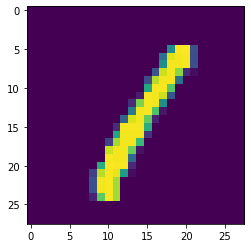

Reshaping the data

,As we are using Deep learning neural network, the input for this network to get trained on should be of higher dimensional. Our dataset is having three-dimensional images so we have to reshape them too higher dimensions

In [ ]:
#(batch,height,width,channel)
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

Applying one hot encoding

One hot encoding to convert numerical values to classes where 0 to 9 are 10 seperate classes if value is 5 class 5 is 1 else 0

In [ ]:
no_of_classes=10
y_train=np_utils.to_categorical(y_train,no_of_classes)
y_test=np_utils.to_categorical(y_test,no_of_classes)

In [ ]:
y_test[3]

In [ ]:
array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Add CNN Layers

In [ ]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

model.add(Flatten())
model.add(Dense(no_of_classes,activation='softmax'))

Compiling the model

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

Train the model

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 237s 126ms/step - loss: 0.0667 - accuracy: 0.9801 - val_loss: 0.0696 - val_accuracy: 0.9788
Epoch 2/5
1875/1875 [==============================] - 241s 128ms/step - loss: 0.0492 - accuracy: 0.9844 - val_loss: 0.0686 - val_accuracy: 0.9785
Epoch 3/5
1875/1875 [==============================] - 214s 114ms/step - loss: 0.0356 - accuracy: 0.9896 - val_loss: 0.0872 - val_accuracy: 0.9791
Epoch 4/5
1875/1875 [==============================] - 204s 109ms/step - loss: 0.0260 - accuracy: 0.9921 - val_loss: 0.1150 - val_accuracy: 0.9766
Epoch 5/5
1875/1875 [==============================] - 202s 108ms/step - loss: 0.0229 - accuracy: 0.9930 - val_loss: 0.1600 - val_accuracy: 0.9703
